# Bigrams network graph

In [154]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from plotnine import *

def words_network_graph(dataset,
                        tuple,
                        raw,
                        frequency):
    
    # read data
    data = pd.read_csv(dataset)   
    def tupler(w):
        return (w.split(' ')[0],w.split(' ')[1]) # <1>
    data[tuple] = data[raw].apply(lambda x: tupler(x)) 
    data = data[data['frequency']>=frequency]

    # create dictionary with counts
    d = data.set_index(tuple).T.to_dict('records')

    # network graph
    G = nx.Graph()

    # edges connections
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v*30))

    # nodes position
    pos = nx.spring_layout(G,k=2)

    # edges weight
    weights = nx.get_edge_attributes(G, 'weight').values()
    weights = list(weights)
    weights = list([w*0.0060 for w in weights])
    
    # plot
    
    blue_munsell = '#0085A1'
    eerie_black = '#242728'
    
    fig, ax = plt.subplots(figsize=(8,5))
    fig.set_facecolor(eerie_black)
    ax.set_axis_off()
    
    nx.draw_networkx(G, pos,
                     width=weights,
                     edge_color='white',
                     node_color=blue_munsell,
                     with_labels=False,
                     ax=ax,
                     node_size=50)
    
    # labels nudge
    def nudge(pos, x_shift, y_shift):
        return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()} # <2>
    pos_nodes = nudge(pos, 0.01, 0.1)
    nx.draw_networkx_labels(G, 
                            pos=pos_nodes, 
                            ax=ax,
                            font_color='white',
                            font_size=7)

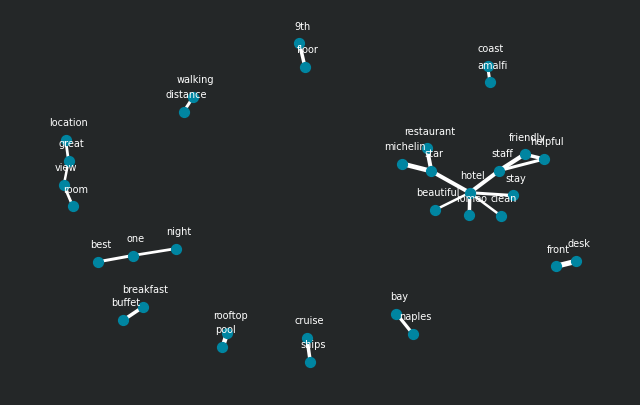

In [2]:
words_network_graph('reviews_bigrams.csv',
                    'bigram',
                    'bigrams',
                    10)

# Words trend over time

In [299]:
def words_overtime_chart(words_list):
    
    # read data
    data = pd.read_csv('data.csv')
    # tokens list by review date
    wot = data.groupby('review_date', as_index=False)['tokens'].sum()
    # frequency of words on tokens length
    for word in words_list:
        wot[word] = wot['tokens'].apply(lambda x: x.count(word)/len(x))
        
    # appending review_date for melt    
    words_list.append('review_date')
    wot = wot[words_list].melt(id_vars=['review_date'], var_name='words', value_name='value')
    
    wot['value'] = wot['value']*100
    
    # plot # <1>
    
    blue_munsell = '#0085A1'
    eerie_black = '#242728'
    
    pl = (
        ggplot(wot) 
        + aes(x='review_date',y='value',group=1)
        + geom_point(color='white')
        + geom_line(colour=blue_munsell,size=1)
        + geom_smooth(method='lm',colour='white')
        + facet_wrap('~words',ncol=1)
        + scale_x_date(date_labels = "%b %Y")
        + theme_classic()
        + theme(figure_size=(7,5),
                axis_text_x=element_text(angle=90,color='white'),
                axis_text_y=element_text(color='white'),
                axis_title_x=element_text(color='white'),
                axis_title_y=element_text(color='white'),
                strip_background=element_rect(fill=blue_munsell),
                panel_background=element_rect(fill=eerie_black),
                plot_background=element_rect(fill=eerie_black)
                )
        + xlab('Review date')
        + ylab('Frequency (%)')
        
        )
    
    print(pl)

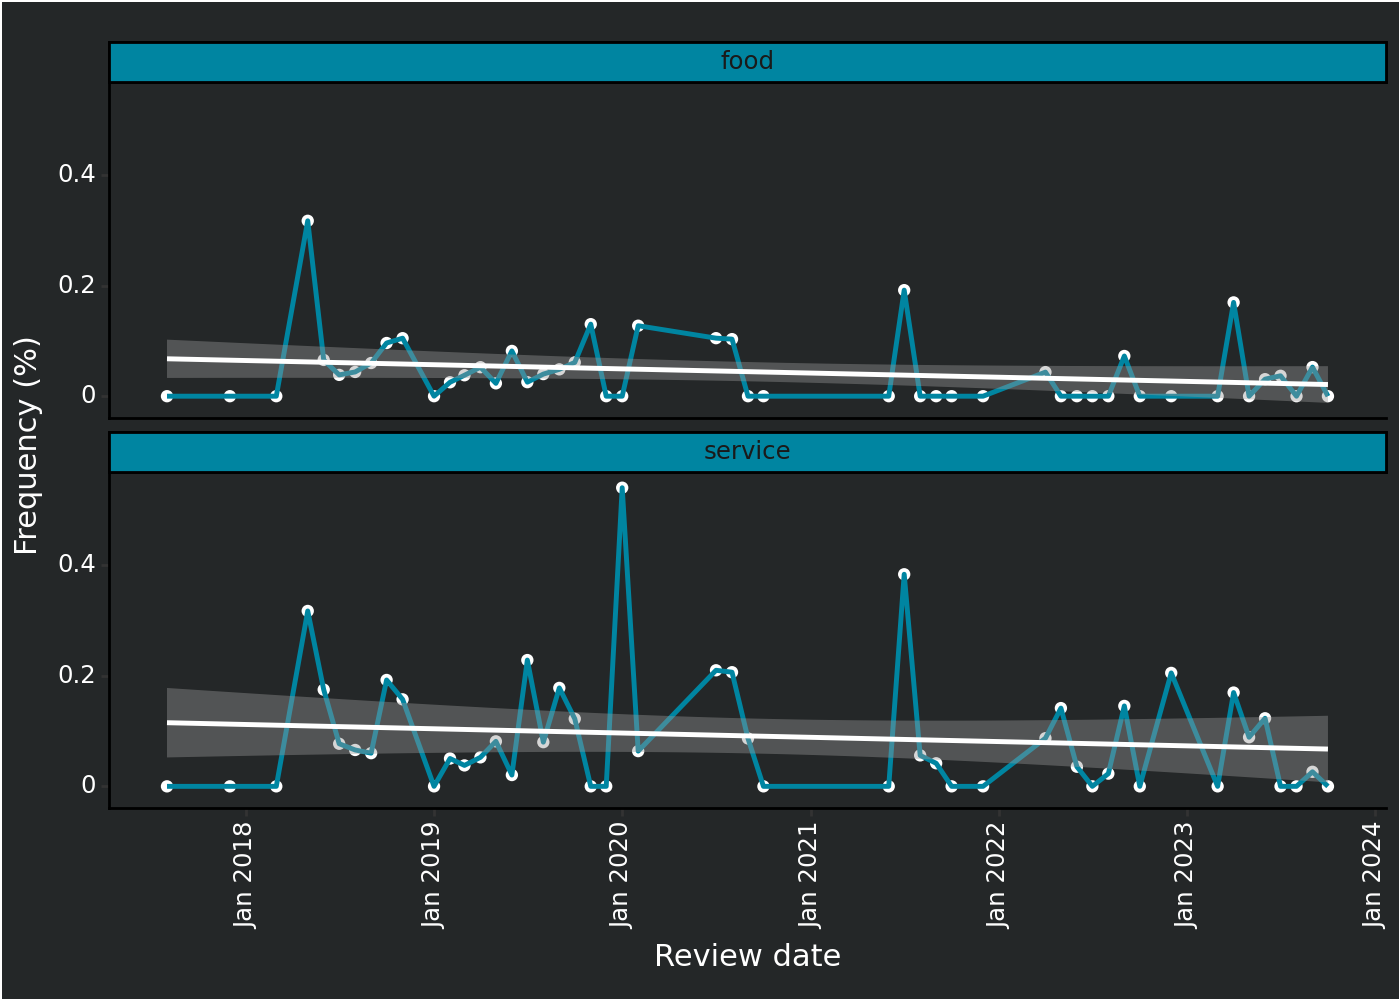

In [300]:
words_overtime_chart(['food','service'])

In [1]:
# import pandas as pd
# from transformers import pipeline

# zsc = pipeline(model="facebook/bart-large-mnli")

# def zero_shot_predictor(data,labels):
    
#     out = zsc(data,
#     candidate_labels=labels)
#     labels = dict(zip(out['labels'],out['scores']))
#     out = max(labels, key=labels.get)
    
#     return out

# def zero_shot_analyzer(data,labels):
    
#     out = zsc(data,
#     candidate_labels=labels)
#     df = pd.DataFrame({'labels':out['labels'],'score':out['scores']})